## Objective

To Predict the customers who are about to churn from a telecom operator<br>
Business Objective is to predict the High Value Customers only<br>
We need to predict Churn on the basis of Action Period (Churn period data needs to be deleted after labelling)<br>
Churn would be based on Usage<br>
Requirement:<br>
1) Churn Prediction Model <br>
2) Best Predictor Variables <br>

## Approach

1) Data Understanding & Cleaning <br>
2) EDA <br>
3) Derived Metrics <br>
4) Dimensionality Reduction using PCA <br>
5) Classification models to predict Churn (Use various Models & Handle class imbalance) <br>
6) Model Evaluation <br>
7) Prepare Model for Predictor variables selection (Prepare multiple models & choose the best one) <br>
8) Summarize <br>

In [702]:
# Importing the required Librarires

import pandas as pd
import numpy as np
import jovian
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [605]:
# Reading the dataset
path=r"F:\ML & AI\upGrad\PGDM\Main_Course\Machine Learning - 2\Telecom Churn_Case_study"
df=pd.read_csv(path + r"\telecom_churn_data.csv")

In [606]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [607]:
df.shape

(99999, 226)

## Data Understanding & Cleaning

In [608]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

#### Imputing Missing Values

In [609]:
# Fetching all recharge columns

col_rech=[]
for col in list(df.columns):
    if ('rech' in col):
        col_rech.append(col)

In [654]:
col_rech

['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_num_9',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'total_rech_amt_9',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'max_rech_amt_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_3g_9',
 'arpu_2g_6',
 'arpu_2g_

In [610]:
for col in list(df.columns):
    if ('arpu' in col):
        col_rech.append(col)

In [611]:
# Fetching all date columns

col_dates=[]
for col in list(df.columns):
    if ('date' in col):
        col_dates.append(col)

In [612]:
# Calculating missing values in columns

missing = round(100*(df.isnull().sum()/len(df)), 2)
missing[missing != 0]

loc_og_t2o_mou           1.02
std_og_t2o_mou           1.02
loc_ic_t2o_mou           1.02
last_date_of_month_7     0.60
last_date_of_month_8     1.10
                        ...  
night_pck_user_9        74.08
fb_user_6               74.85
fb_user_7               74.43
fb_user_8               73.66
fb_user_9               74.08
Length: 166, dtype: float64

In [613]:
# Imputing zeroes for all recharge columns

df[col_rech]=df[col_rech].apply(lambda x: x.fillna(0))

In [614]:
# df['total_rech_amt_data_'+str(i)] = df['total_rech_num_data_'+str(i)]*df['av_rech_amt_data_'+str(i)]

In [615]:
# Fetching all categorical columns

col_categorical=['night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9','fb_user_6','fb_user_7','fb_user_8','fb_user_9']

In [616]:
# Imputing missing categories as -1

df[col_categorical]=df[col_categorical].apply(lambda x: x.fillna(-1))

In [617]:
df['last_date_of_month_7'].fillna('7/31/2014',inplace = True)
df['last_date_of_month_8'].fillna('8/31/2014',inplace = True)
df['last_date_of_month_9'].fillna('9/30/2014',inplace = True)

In [618]:
# Converting Date Series columns to useful information

df[col_dates] = df[col_dates].apply(pd.to_datetime)
df['duration_last_rech_6']= df['last_date_of_month_6']-df['date_of_last_rech_6']
df['duration_last_rech_7']= df['last_date_of_month_7']-df['date_of_last_rech_7']
df['duration_last_rech_8']= df['last_date_of_month_8']-df['date_of_last_rech_8']
df['duration_last_rech_9']= df['last_date_of_month_9']-df['date_of_last_rech_9']

df['duration_last_rech_6']=df['duration_last_rech_6'].astype(str)
df['duration_last_rech_6']=df['duration_last_rech_6'].str.split(" ",n=3,expand=True)[0]
df.loc[(df['duration_last_rech_6']=='NaT'),'duration_last_rech_6']=0
df['duration_last_rech_6']=df['duration_last_rech_6'].astype(int)

df['duration_last_rech_7']=df['duration_last_rech_7'].astype(str)
df['duration_last_rech_7']=df['duration_last_rech_7'].str.split(" ",n=3,expand=True)[0]
df.loc[(df['duration_last_rech_7']=='NaT'),'duration_last_rech_7']=0
df['duration_last_rech_7']=df['duration_last_rech_7'].astype(int)

df['duration_last_rech_8']=df['duration_last_rech_8'].astype(str)
df['duration_last_rech_8']=df['duration_last_rech_8'].str.split(" ",n=3,expand=True)[0]
df.loc[(df['duration_last_rech_8']=='NaT'),'duration_last_rech_8']=0
df['duration_last_rech_8']=df['duration_last_rech_8'].astype(int)

df['duration_last_rech_9']=df['duration_last_rech_9'].astype(str)
df['duration_last_rech_9']=df['duration_last_rech_9'].str.split(" ",n=3,expand=True)[0]
df.loc[(df['duration_last_rech_9']=='NaT'),'duration_last_rech_9']=0
df['duration_last_rech_9']=df['duration_last_rech_9'].astype(int)

df['duration_last_rech_data_6']= df['last_date_of_month_6']-df['date_of_last_rech_data_6']
df['duration_last_rech_data_7']= df['last_date_of_month_7']-df['date_of_last_rech_data_7']
df['duration_last_rech_data_8']= df['last_date_of_month_8']-df['date_of_last_rech_data_8']
df['duration_last_rech_data_9']= df['last_date_of_month_9']-df['date_of_last_rech_data_9']

df['duration_last_rech_data_6']=df['duration_last_rech_data_6'].astype(str)
df['duration_last_rech_data_6']=df['duration_last_rech_data_6'].str.split(" ",n=3,expand=True)[0]
df.loc[(df['duration_last_rech_data_6']=='NaT'),'duration_last_rech_data_6']=0
df['duration_last_rech_data_6']=df['duration_last_rech_data_6'].astype(int)

df['duration_last_rech_data_7']=df['duration_last_rech_data_7'].astype(str)
df['duration_last_rech_data_7']=df['duration_last_rech_data_7'].str.split(" ",n=3,expand=True)[0]
df.loc[(df['duration_last_rech_data_7']=='NaT'),'duration_last_rech_data_7']=0
df['duration_last_rech_data_7']=df['duration_last_rech_data_7'].astype(int)

df['duration_last_rech_data_8']=df['duration_last_rech_data_8'].astype(str)
df['duration_last_rech_data_8']=df['duration_last_rech_data_8'].str.split(" ",n=3,expand=True)[0]
df.loc[(df['duration_last_rech_data_8']=='NaT'),'duration_last_rech_data_8']=0
df['duration_last_rech_data_8']=df['duration_last_rech_data_8'].astype(int)

df['duration_last_rech_data_9']=df['duration_last_rech_data_9'].astype(str)
df['duration_last_rech_data_9']=df['duration_last_rech_data_9'].str.split(" ",n=3,expand=True)[0]
df.loc[(df['duration_last_rech_data_9']=='NaT'),'duration_last_rech_data_9']=0
df['duration_last_rech_data_9']=df['duration_last_rech_data_9'].astype(int)

In [619]:
# dropping date columns

df=df.drop(col_dates, axis=1)
df.shape

(99999, 222)

In [621]:
cols_mou = []
cols_other = []
for col in list(df[missing.loc[(missing[0]!=0),'index']]):
    if 'mou' in col:
        cols_mou.append(col)
    else:
        cols_other.append(col)
        
        
len(cols_mou)

111

In [638]:
cols_other

['og_others_6',
 'og_others_7',
 'og_others_8',
 'og_others_9',
 'ic_others_6',
 'ic_others_7',
 'ic_others_8',
 'ic_others_9']

In [644]:
# Mode for all these columns is zero thus imputng with zero

for col in cols_other:
    df[col].fillna(0,inplace = True)

In [648]:
# Mode for all these columns is zero thus imputng with zero

for col in cols_mou:
    df[col].fillna(0,inplace = True)

In [649]:
missing = round(100*(df.isnull().sum()/len(df)), 2)
missing[missing != 0]

Series([], dtype: float64)

#### Calculating Churn

In [650]:
churn_cols=['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']
df[churn_cols].describe()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
count,99999.000000,99999.000000,99999.000000,99999.000000
mean,189.214260,289.279198,44.719701,136.056613
std,284.823024,468.980002,198.653570,577.394194
min,0.000000,0.000000,0.000000,0.000000
25%,32.370000,25.510000,0.000000,0.000000
50%,105.890000,125.460000,0.000000,0.000000
75%,236.320000,353.480000,0.000000,0.000000
max,10796.590000,11517.730000,8993.950000,39221.270000


In [651]:
df['total_calls_mou_9'] = df['total_ic_mou_9'] + df['total_og_mou_9']
df['total_internet_mb_9'] =  df['vol_2g_mb_9'] + df['vol_3g_mb_9']
df['churn'] = df.apply(lambda row: 1 if (row.total_calls_mou_9 == 0 and row.total_internet_mb_9 == 0) else 0, axis=1)

In [653]:
# Churn Percentage on full data

(df.loc[(df.churn==1),:].shape[0])/df.shape[0]*100

10.19110191101911

#### Filtering High Value Customers

In [655]:
# Total Amount Data

df['avg_rech_data_amt']=((df['count_rech_2g_6']+df['count_rech_3g_6'])*df['av_rech_amt_data_6'] + (df['count_rech_2g_7']+df['count_rech_3g_7'])*df['av_rech_amt_data_7'])/2 

In [656]:
df['avg_rech_amt']=(df['total_rech_amt_6']+df['total_rech_amt_7'])/2

In [657]:
df['av_rech']=df['avg_rech_data_amt']+df['avg_rech_amt']

In [659]:
df=df.loc[df['av_rech']>df['av_rech'].quantile(0.7),:]

In [660]:
df.shape

(29953, 228)

In [661]:
# Churn % after data Filteration

(df.loc[(df.churn==1),:].shape[0])/df.shape[0]*100

8.122725603445398

#### Deleting data for 9 month

In [662]:
col_9=[]
for col in list(df.columns):
    if ('_9' in col):
        col_9.append(col)
print(col_9)

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'total_rech_data_9', 'max_rech_data_9', 'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9', 'duration_last_rech_9', 'duration_last_rech_data_9', 'total_calls_mou_9', 'total_internet_mb_9']


In [663]:
df=df.drop(col_9,axis=1)

In [664]:
df.shape

(29953, 173)

## EDA

#### Univariate Analysis

In [665]:
# Plot box plot for all columns in the list input_cols.
def box_plot(data,input_cols,ncol):
    leng = len(input_cols)
    if leng%ncol == 0:
        rows = leng//ncol
    else:
        rows = leng//ncol + 1
    
    figure, axes = plt.subplots(nrows=rows, ncols=ncol,figsize=(20,3.5*rows))
    
    for i, xvar in enumerate(input_cols):
            axes[i//ncol,i%ncol].title.set_text(xvar)
            axes[i//ncol,i%ncol].tick_params(axis='x', rotation=45)
            
            axes[i//ncol,i%ncol].boxplot(data[xvar])
            
            
    
    figure.tight_layout(pad=3.0)
    plt.show()
        

# Plot histogram for all columns in the list input_cols.
def plot_histogram(data, input_cols,ncol):
    leng = len(input_cols)
    if leng%ncol == 0:
        rows = leng//ncol
    else:
        rows = leng//ncol + 1
    fig = plt.figure(figsize=(20,3.5*rows))
    
    for i, xvar in enumerate(input_cols):
        
            fig.add_subplot(rows,ncol,i+1).tick_params(axis='x', rotation=45)
            fig.add_subplot(rows,ncol,i+1).title.set_text(xvar + " histogram")
            sns.distplot(data[xvar],hist = True)
            
    fig.tight_layout(pad=3.0)

# Plot histogram for all columns in the list input_cols.
def plot_histogram_monthly(data, input_cols,ncol,remove_outliers = False):
    leng = len(input_cols)
    if leng%ncol == 0:
        rows = leng//ncol
    else:
        rows = leng//ncol + 1
    fig = plt.figure(figsize=(10,5.5*rows))
    
    for i, xvar in enumerate(input_cols):
            fig.add_subplot(rows,ncol,i+1).tick_params(axis='x', rotation=45)
            fig.add_subplot(rows,ncol,i+1).title.set_text(xvar + " histogram")
            
            
            if remove_outliers:
                Q1_6=np.percentile(data[xvar+"6"], 25)
                Q3_6=np.percentile(data[xvar+"6"], 75)
                IQR_6=Q3_6-Q1_6
                outlier_range_6=IQR_6*1.5
                d6 = data[(data[xvar+"6"]>=Q1_6-outlier_range_6) & (data[xvar+"6"]<=Q3_6+outlier_range_6)][xvar+"6"]
                
                Q1_7=np.percentile(data[xvar+"7"], 25)
                Q3_7=np.percentile(data[xvar+"7"], 75)
                IQR_7=Q3_7-Q1_7
                outlier_range_7=IQR_7*1.5
                d7 = data[(data[xvar+"7"]>=Q1_7-outlier_range_7) & (data[xvar+"7"]<=Q3_7+outlier_range_7)][xvar+"7"]

                Q1_8=np.percentile(data[xvar+"8"], 25)
                Q3_8=np.percentile(data[xvar+"8"], 75)
                IQR_8=Q3_8-Q1_8
                outlier_range_8=IQR_8*1.5
                d8 = data[(data[xvar+"8"]>=Q1_8-outlier_range_8) & (data[xvar+"8"]<=Q3_8+outlier_range_8)][xvar+"8"]
                
                sns.distplot(d6,hist = False,color="y")
                sns.distplot(d7,hist = False,color="r")
                sns.distplot(d8,hist = False,color="g")
            
            else:
                
            
                sns.distplot(data[xvar+"6"],hist = False,color="y")
                sns.distplot(data[xvar+"7"],hist = False,color="r")
                sns.distplot(data[xvar+"8"],hist = False,color="g")
            
            
    fig.tight_layout(pad=3.0)

In [666]:
cols_monthly = []
for col in df.columns:
    if ("_6" in col) or ("_7" in col) or ("_8" in col) or ("_diff" in col):
        cols_monthly.append(col)
        
cols_non_monthly = list(set(list(df.columns)) - set(cols_monthly))
cols_non_monthly

['jul_vbc_3g',
 'loc_og_t2o_mou',
 'avg_rech_data_amt',
 'circle_id',
 'jun_vbc_3g',
 'loc_ic_t2o_mou',
 'aon',
 'avg_rech_amt',
 'av_rech',
 'mobile_number',
 'sep_vbc_3g',
 'aug_vbc_3g',
 'churn',
 'std_og_t2o_mou']

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

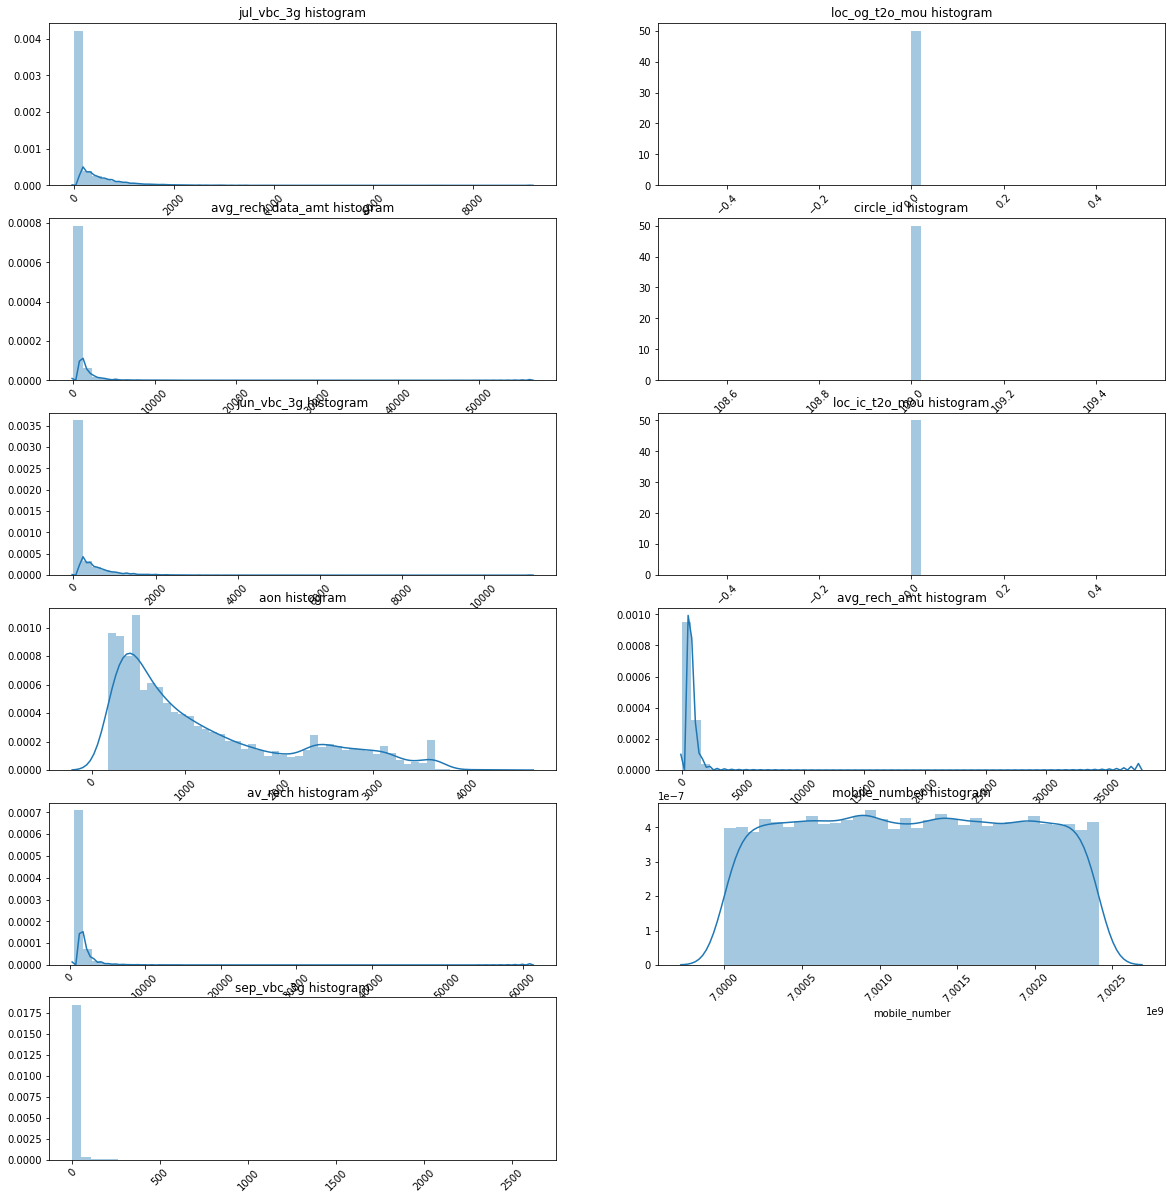

In [669]:
plot_histogram(df,cols_non_monthly,2)

In [671]:
cols_monthly_6 = []
for col in cols_monthly:
    if '_6' in col:
        cols_monthly_6.append(col)

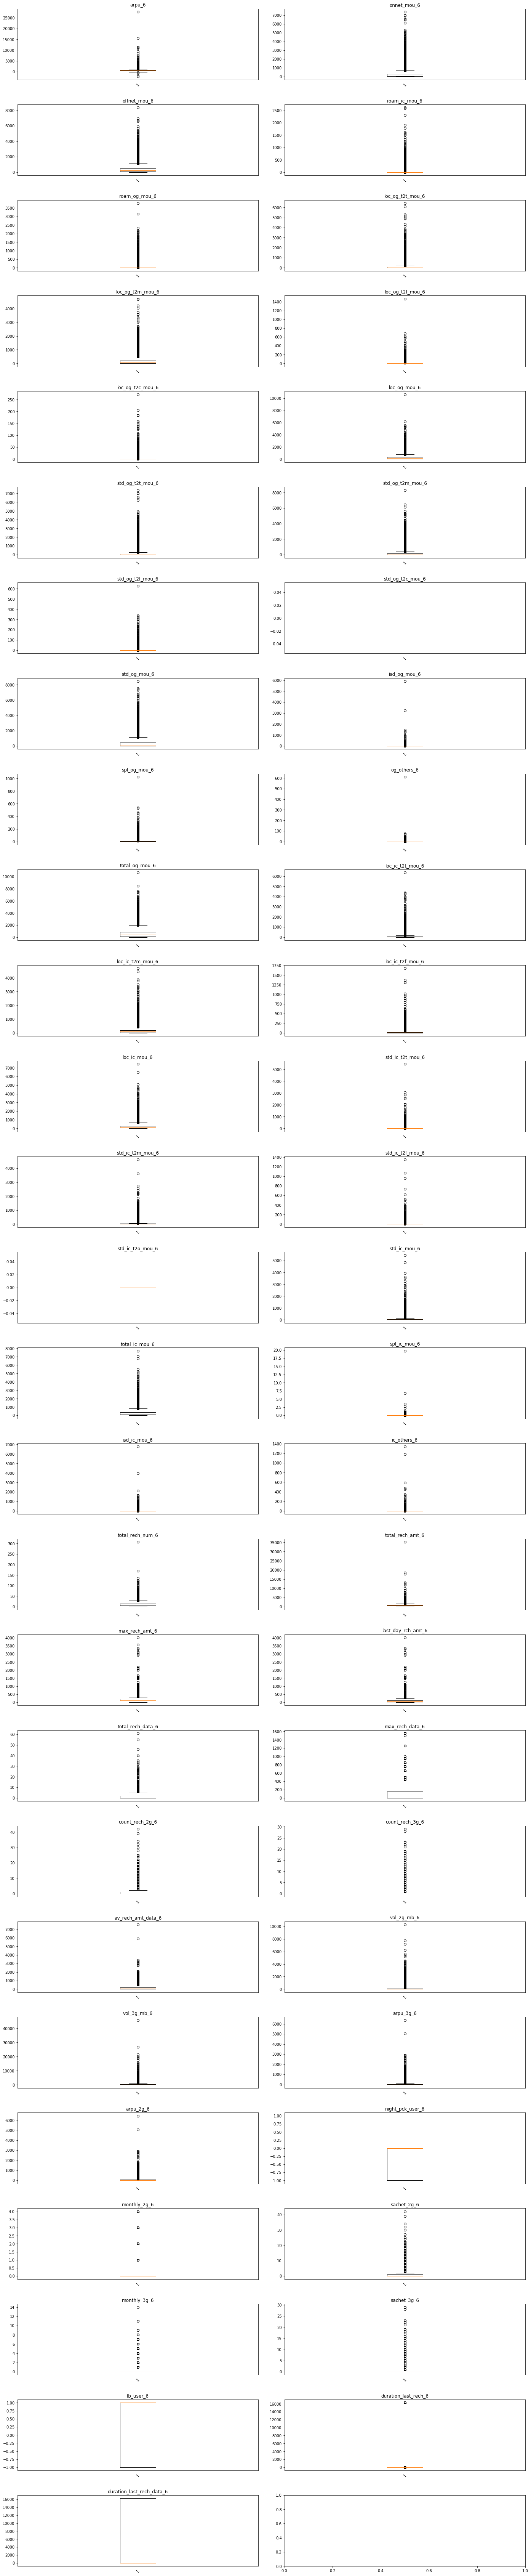

In [672]:
box_plot(df,cols_monthly_6,2)

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

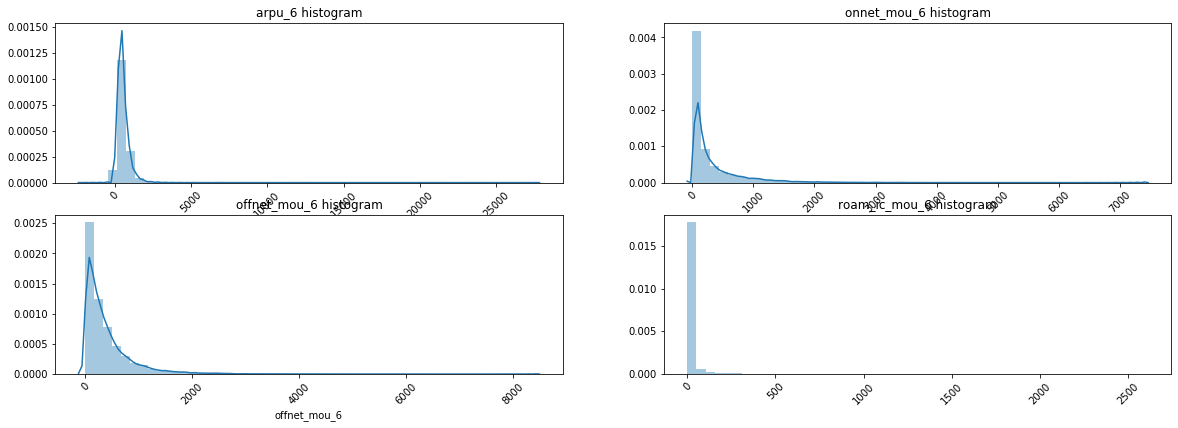

In [673]:
plot_histogram(df,cols_monthly_6,2)

#### Bi-Variate Analysis

In [674]:
df_1=df

In [703]:
df_1['total_ic_mou_6_bins'] = pd.cut(x=df_1['total_ic_mou_6'], bins=[0,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,11000,12000,13000,14000,15000])
res3=pd.pivot_table(df_1, values='mobile_number', index=['total_ic_mou_6_bins'],
                    columns=['churn'], aggfunc=np.size)

In [704]:
df_1['total_ic_mou_7_bins'] = pd.cut(x=df_1['total_ic_mou_7'], bins=[0,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,11000,12000,13000,14000,15000])
res4=pd.pivot_table(df_1, values='mobile_number', index=['total_ic_mou_7_bins'],
                    columns=['churn'], aggfunc=np.size)

In [705]:
df_1['total_ic_mou_8_bins'] = pd.cut(x=df_1['total_ic_mou_8'], bins=[0,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,11000,12000,13000,14000,15000])
res5=pd.pivot_table(df_1, values='mobile_number', index=['total_ic_mou_8_bins'],
                    columns=['churn'], aggfunc=np.size)

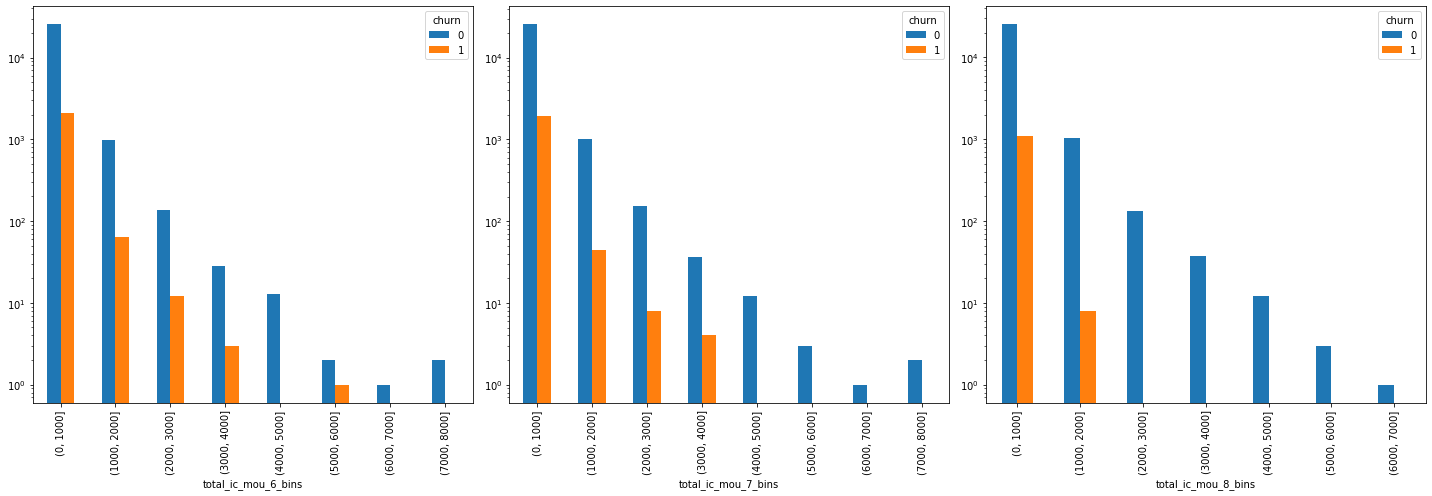

In [706]:
fig, axes = plt.subplots(ncols=3,figsize=(100,100))

res3.plot.bar(ax=axes[0],logy=True,figsize=(20,7))
res4.plot.bar(ax=axes[1],logy=True,figsize=(20,7))
res5.plot.bar(ax=axes[2],logy=True,figsize=(20,7))
fig.tight_layout()

In [707]:
df_1['total_og_mou_6_bins'] = pd.cut(x=df_1['total_og_mou_6'], bins=[0,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,11000,12000,13000,14000,15000])
res6=pd.pivot_table(df_1, values='mobile_number', index=['total_og_mou_6_bins'],
                    columns=['churn'], aggfunc=np.size)

In [708]:
df_1['total_og_mou_7_bins'] = pd.cut(x=df_1['total_og_mou_7'], bins=[0,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,11000,12000,13000,14000,15000])
res7=pd.pivot_table(df_1, values='mobile_number', index=['total_og_mou_7_bins'],
                    columns=['churn'], aggfunc=np.size)

In [709]:
df_1['total_og_mou_8_bins'] = pd.cut(x=df_1['total_og_mou_8'], bins=[0,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,11000,12000,13000,14000,15000])
res8=pd.pivot_table(df_1, values='mobile_number', index=['total_og_mou_8_bins'],
                    columns=['churn'], aggfunc=np.size)

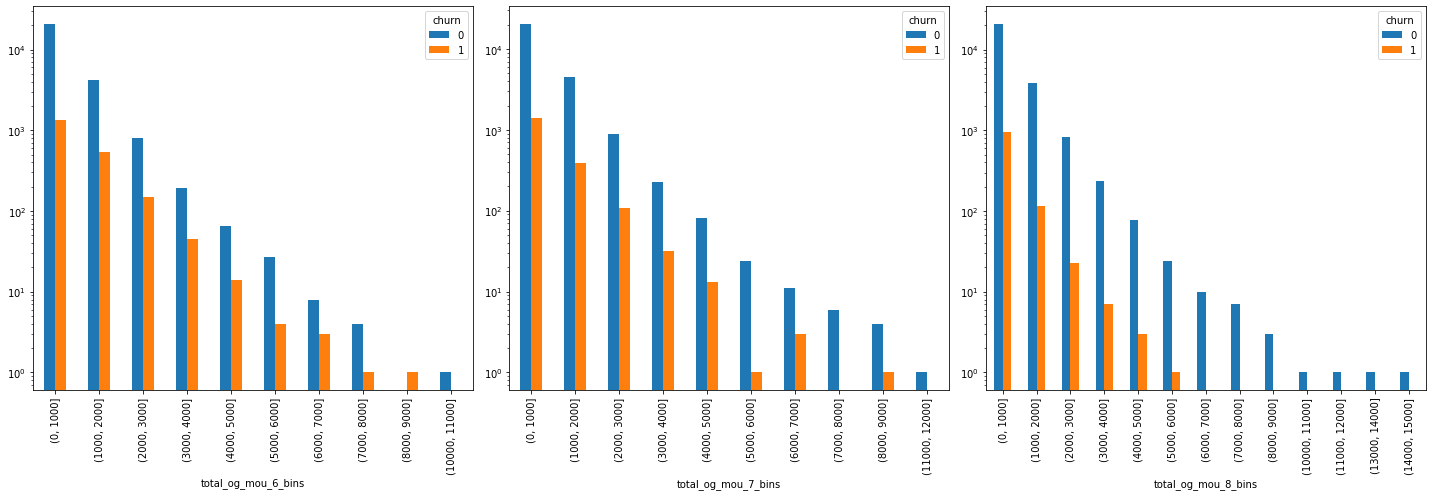

In [710]:
fig, axes = plt.subplots(ncols=3,figsize=(100,100))

res6.plot.bar(ax=axes[0],logy=True,figsize=(20,7))
res7.plot.bar(ax=axes[1],logy=True,figsize=(20,7))
res8.plot.bar(ax=axes[2],logy=True,figsize=(20,7))
fig.tight_layout()

In [711]:
df_1['vol_2g_mb_6_bins'] = pd.cut(x=df_1['vol_2g_mb_6'], bins=[0,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,11000,12000,13000,14000,15000])
res9=pd.pivot_table(df_1, values='mobile_number', index=['vol_2g_mb_6_bins'],
                    columns=['churn'], aggfunc=np.size)

In [712]:
df_1['vol_2g_mb_7_bins'] = pd.cut(x=df_1['vol_2g_mb_7'], bins=[0,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,11000,12000,13000,14000,15000])
res10=pd.pivot_table(df_1, values='mobile_number', index=['vol_2g_mb_7_bins'],
                    columns=['churn'], aggfunc=np.size)

In [713]:
df_1['vol_2g_mb_8_bins'] = pd.cut(x=df_1['vol_2g_mb_8'], bins=[0,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,11000,12000,13000,14000,15000])
res11=pd.pivot_table(df_1, values='mobile_number', index=['vol_2g_mb_8_bins'],
                    columns=['churn'], aggfunc=np.size)

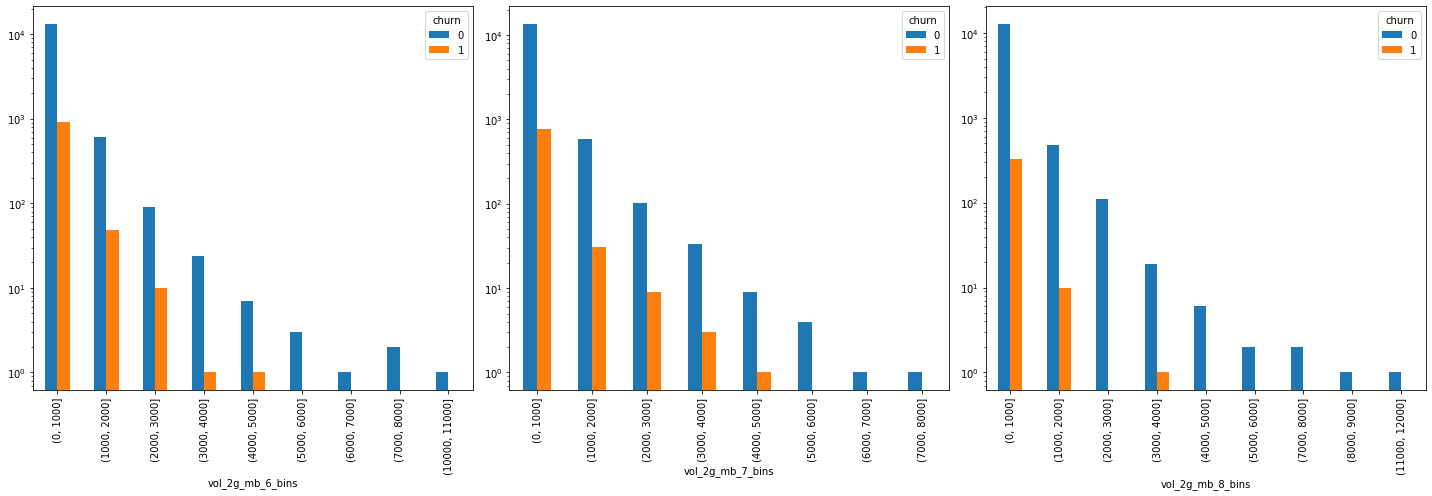

In [714]:
fig, axes = plt.subplots(ncols=3,figsize=(100,100))

res9.plot.bar(ax=axes[0],logy=True,figsize=(20,7))
res10.plot.bar(ax=axes[1],logy=True,figsize=(20,7))
res11.plot.bar(ax=axes[2],logy=True,figsize=(20,7))
fig.tight_layout()

In [715]:
df_1['vol_3g_mb_6_bins'] = pd.cut(x=df_1['vol_3g_mb_6'],bins=[0,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,11000,12000,13000,14000,15000,46000])
res12=pd.pivot_table(df_1, values='mobile_number', index=['vol_3g_mb_6_bins'],
                    columns=['churn'], aggfunc=np.size)

In [716]:
df_1['vol_3g_mb_7_bins'] = pd.cut(x=df_1['vol_3g_mb_7'], bins=[0,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,11000,12000,13000,14000,15000,46000])
res13=pd.pivot_table(df_1, values='mobile_number', index=['vol_3g_mb_7_bins'],
                    columns=['churn'], aggfunc=np.size)

In [717]:
df_1['vol_3g_mb_8_bins'] = pd.cut(x=df_1['vol_3g_mb_8'], bins=[0,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,11000,12000,13000,14000,15000,46000])
res14=pd.pivot_table(df_1, values='mobile_number', index=['vol_3g_mb_8_bins'],
                    columns=['churn'], aggfunc=np.size)

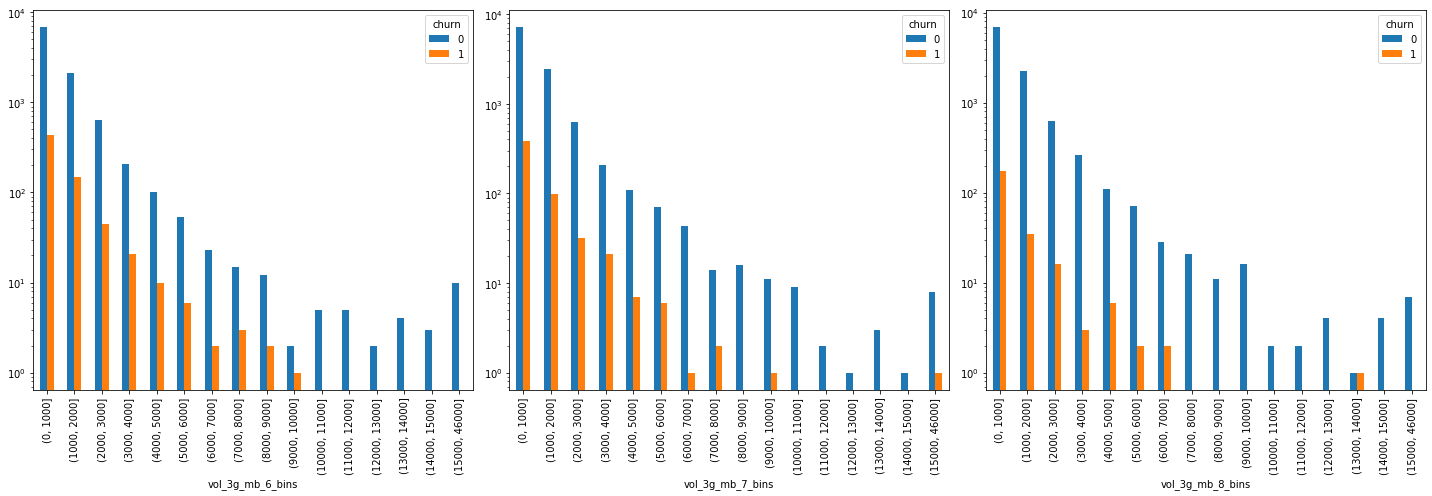

In [718]:
fig, axes = plt.subplots(ncols=3,figsize=(100,100))

res12.plot.bar(ax=axes[0],logy=True,figsize=(20,7))
res13.plot.bar(ax=axes[1],logy=True,figsize=(20,7))
res14.plot.bar(ax=axes[2],logy=True,figsize=(20,7))
fig.tight_layout()

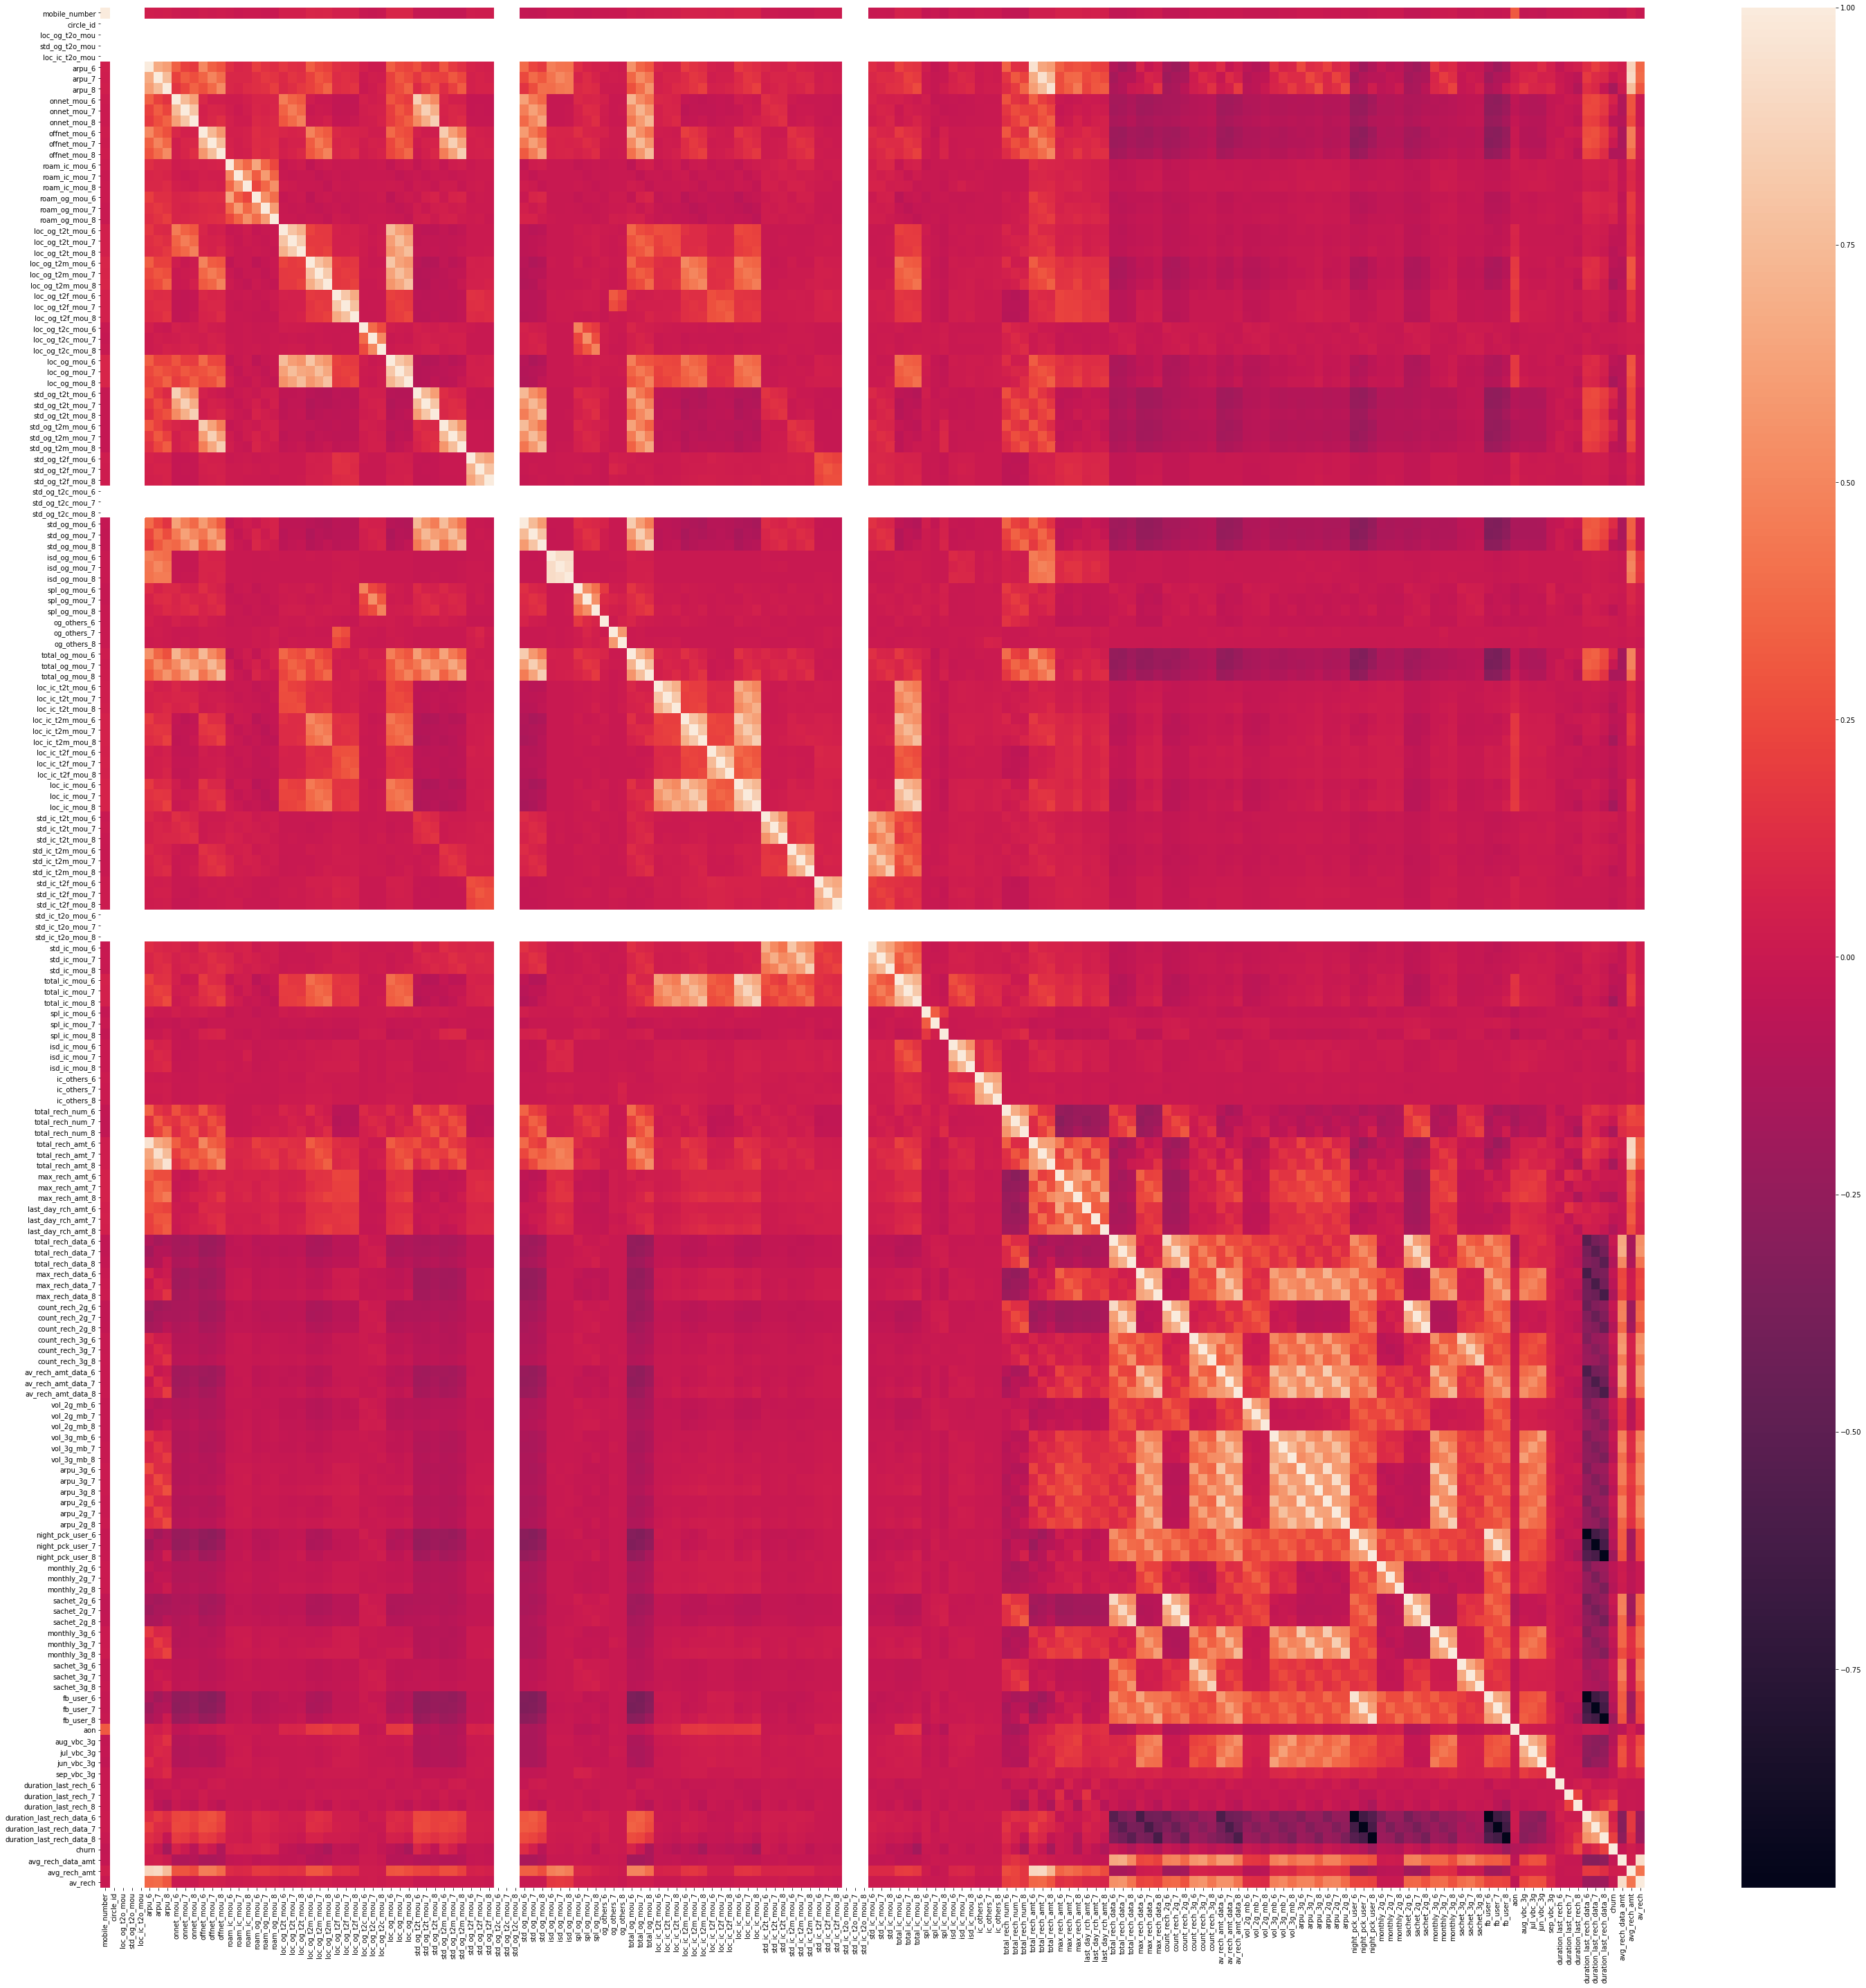

In [692]:
plt.figure(figsize = (50, 50))
sns.heatmap(df.corr())
plt.show()

#### Summary

In [693]:
# EDA Summary

## Data Preparation

In [698]:
# Outlier Treatment

In [701]:
# Scaling the data set

scaler = StandardScaler()
df_trans = scaler.fit_transform(df)

In [695]:
# Applying PCA

pca = PCA(random_state=42)
pca.fit(df_trans)

In [696]:
# Splitting to Train & Test Data Sets

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
